In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# preprocessing data (data cleaning)
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [2]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'age': array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
        7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
        6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
        8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
        6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
        4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
        4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
        3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
        3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
        1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
        2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
        3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
        2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
        9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

C:\Users\neyla\AppData\Local\Temp\ipykernel_22780\3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
change = df['gender'] == 'Other'
df.loc[change, 'gender'] = np.random.choice(['Male', 'Female'], size=change.sum())

In [12]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
# feature engineering
# kategori bmi 
def bmi_category(bmi):
    if bmi < 18.5: return 'underweight'
    elif bmi < 25: return 'normal'
    elif bmi < 30: return 'overweight'
    else: return 'obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)
# penyakit jantung dan hipertensi 
df['high_risk'] = ((df['hypertension'] == 1) | (df['heart_disease'] == 1)).astype(int)
# rasio glukosa & bmi 
df['glucose_bmi_ratio'] = df['avg_glucose_level'] / df['bmi']
# lifestyle
df["smoke_score"] = df["smoking_status"].replace({
    "never smoked": 0,
    "formerly smoked": 1,
    "smokes": 2,
    "Unknown": 0
})
df["work_score"] = df["work_type"].replace({
    "children": 0,
    "Never_worked": 0,
    "Private": 1,
    "Self-employed": 2,
    "Govt_job": 1
})

C:\Users\neyla\AppData\Local\Temp\ipykernel_22780\1885954088.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoke_score"] = df["smoking_status"].replace({
C:\Users\neyla\AppData\Local\Temp\ipykernel_22780\1885954088.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["work_score"] = df["work_type"].replace({


In [14]:
label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_category']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,high_risk,glucose_bmi_ratio,smoke_score,work_score
1811,0,23.0,0,0,0,2,1,64.10,19.8,0,0,0,0,3.237374,0,1
3991,0,57.0,0,0,1,2,1,82.62,28.4,2,0,2,0,2.909155,0,1
3927,0,62.0,0,0,1,2,1,88.32,36.3,0,0,1,0,2.433058,0,1
2713,1,32.0,0,0,1,2,0,115.86,33.3,2,0,1,0,3.479279,0,1
106,0,50.0,1,0,1,2,0,73.18,30.3,1,1,1,1,2.415182,1,1
2538,1,10.0,0,0,0,4,0,84.02,18.7,2,0,0,0,4.493048,0,0
4115,0,31.0,0,0,0,2,0,70.51,26.9,1,0,2,0,2.621190,1,1
1710,1,45.0,0,0,1,2,0,58.25,24.0,3,0,0,0,2.427083,2,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1,0,1,0,1.722268,1,1
3035,1,33.0,0,0,1,3,1,90.68,31.7,3,0,1,0,2.860568,2,2


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Logistic Regression ===
Accuracy: 0.7514677103718199

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.55      1022
weighted avg       0.95      0.75      0.82      1022



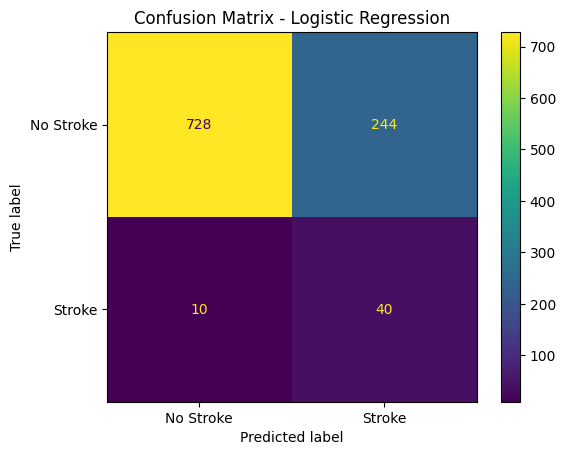

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

print("=== Logistic Regression ===")
print("Accuracy:", acc_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


=== Support Vector Machine (SVM) ===
Akurasi: 0.7681017612524462

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.86       972
           1       0.12      0.62      0.21        50

    accuracy                           0.77      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.77      0.83      1022



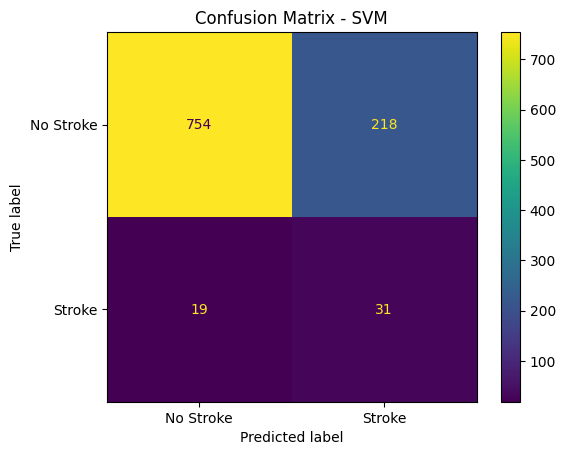

In [17]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("=== Support Vector Machine (SVM) ===")
print("Akurasi:", acc_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - SVM")
plt.show()
